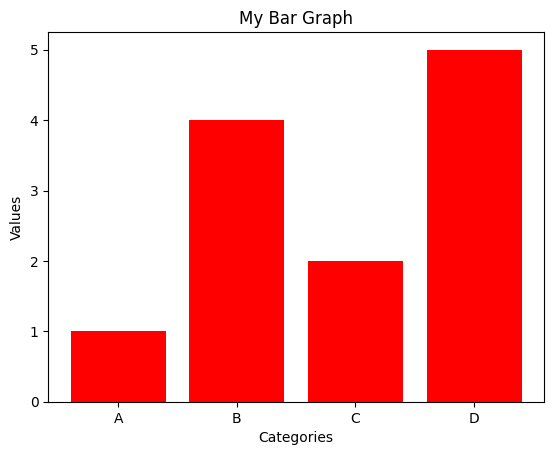

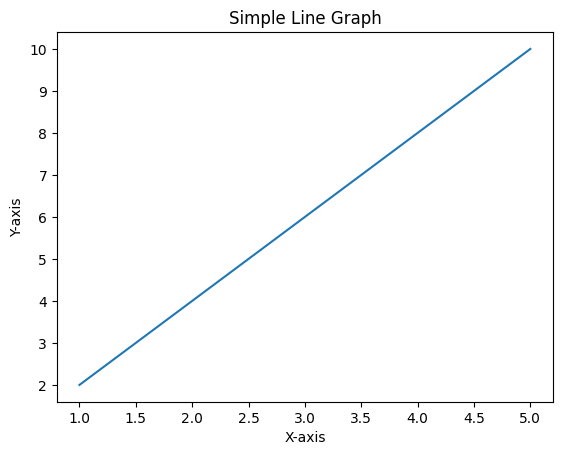

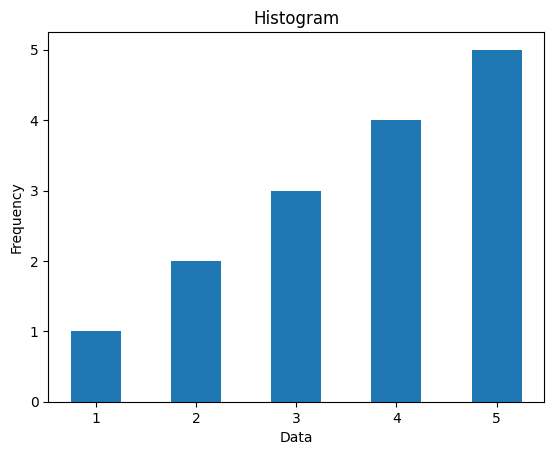

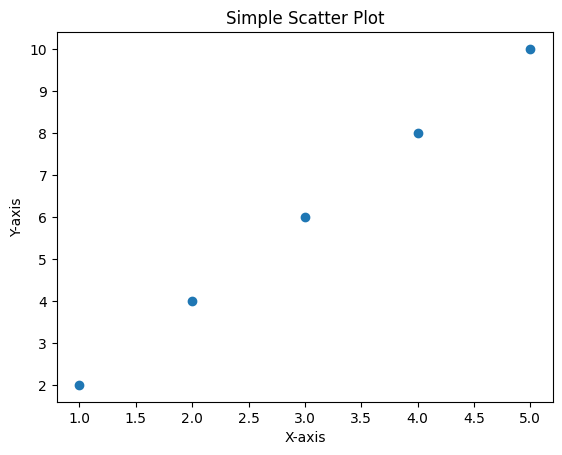

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


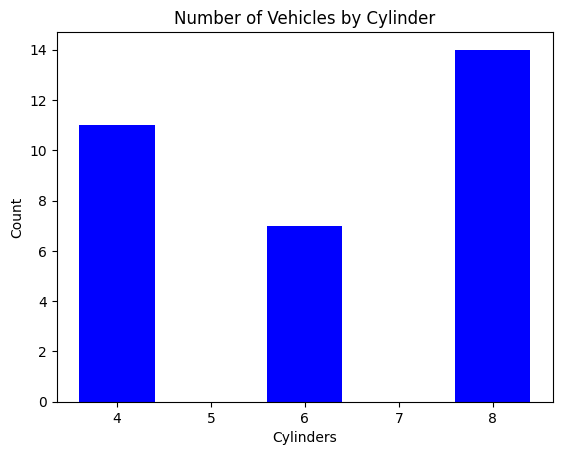

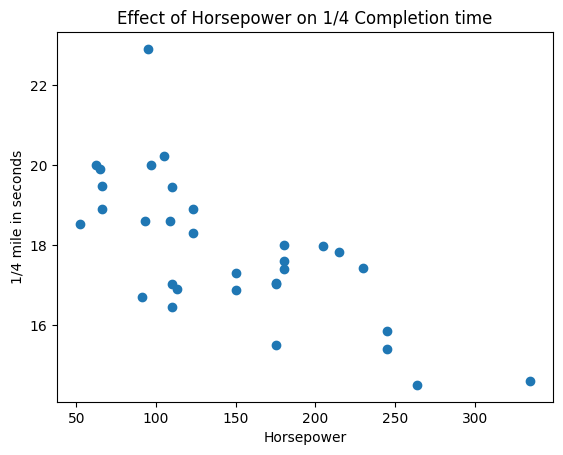

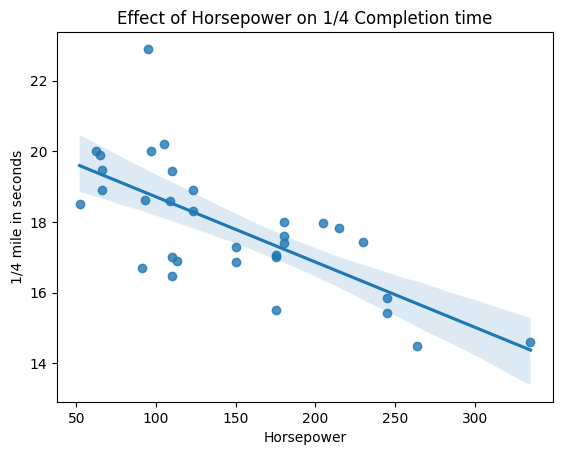

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 12 09:26:50 2023

@author: jbrweelden
"""

import pandas as pd
import matplotlib.pyplot as plt

# First, see how simple graphs are made

##### Bar graph

# Data for the bar graph
labels = ['A', 'B', 'C', 'D']
values = [1, 4, 2, 5]

# Create the bar graph
plt.bar(labels, values, color='red')

# Add a title and axis labels
plt.title('My Bar Graph')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the graph
plt.show()

##### Line graph

# Sample data
x = [1, 2, 3, 4, 5]  # x-axis values
y = [2, 4, 6, 8, 10]  # y-axis values

# Create a line plot
plt.plot(x, y)

# Customize the plot
plt.title('Simple Line Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the plot
plt.show()

##### Histogram

# Sample data
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

# Create histogram, set bar width and alignment
plt.hist(data, bins=[1, 2, 3, 4, 5, 6], width=0.5, rwidth=0.5, align='left')

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram')

# customize x-axis ticks
custom_xticks = [1, 2, 3, 4, 5]
plt.xticks(custom_xticks)

# Show plot
plt.show()

##### Scatterplot

# Sample data
x = [1, 2, 3, 4, 5]  # x-axis values
y = [2, 4, 6, 8, 10]  # y-axis values

# Create a scatter plot
plt.scatter(x, y)

# Customize the plot
plt.title('Simple Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the plot
plt.show()

##### Next, create graphs based on a dataframe (bar chart and scatterplot as example)

##### Bar chart based on dataframe

# Import data from the .csv file
df = pd.read_csv('mtcars.csv')

# Preview the first 5 rows to see how the data is imported
print(df.head())

# We will group the data by amount of cylinders, 
# and count how many cars are in the dataset for each category

grouped_data = df['cyl'].value_counts()

# Create the bar plot
# grouped_data.index creates each category, the grouped_data.values provides the counts
# in other words: the index is the x-axis, the values the y-axis
plt.bar(grouped_data.index, grouped_data.values, color='blue')

# Customize the plot
plt.title('Number of Vehicles by Cylinder')
plt.xlabel('Cylinders')
plt.ylabel('Count')

# Display the plot
plt.show()

##### Scatterplot based on dataframe. 

# You would expect that more horsepower leads to a faster completion of a 1/4 mile. 
# To see if this could be true, we plot the variables qsec and hp on a scatterplot

plt.scatter(df['hp'],df['qsec'])

# Customize the plot
plt.title('Effect of Horsepower on 1/4 Completion time')
plt.xlabel('Horsepower')
plt.ylabel('1/4 mile in seconds')

plt.show()

# To add a linear regression model, use the Seaborn library

import seaborn as sns

# Create a scatter plot with regression line and confidence interval
sns.regplot(x=df['hp'], y=df['qsec'])

# Customize the plot
plt.title('Effect of Horsepower on 1/4 Completion time')
plt.xlabel('Horsepower')
plt.ylabel('1/4 mile in seconds')

plt.show()

# Include equation and r-squared in the plot. We also need the statsmodels library

import statsmodels.api as sm

# Calculate linear regression
x_with_intercept = sm.add_constant(df['hp'])
model = sm.OLS(df['qsec'], x_with_intercept)
result = model.fit()
slope = result.params[1]
intercept = result.params[0]
r_squared = result.rsquared

# Create a scatter plot with regression line and confidence interval
sns.regplot(x=df['hp'], y=df['qsec'])

# Add linear regression equation to the plot
equation = f'y = {intercept:.2f} + {slope:.2f}x'
r_squared_text = f'R-squared = {r_squared:.2f}'
plt.text(0.5, 9, equation, ha='center')
plt.text(0.5, 10, r_squared_text, ha='center')

# Customize the plot
plt.title('Effect of Horsepower on 1/4 Completion time')
plt.xlabel('Horsepower')
plt.ylabel('1/4 mile in seconds')

# Display the plot
plt.show()